<a href="https://colab.research.google.com/github/Petrowykh/belhard/blob/main/hw4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.2 MB/s eta 0:00:00


In [2]:
from deap import base, algorithms
from deap import creator
from deap import tools

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install gym

In [6]:
import gym

In [7]:
env = gym.make('MountainCar-v0')

LENGTH_CHROM = 200    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 50   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 150    # максимальное количество поколений
HALL_OF_FAME_SIZE = 3

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [9]:
toolbox = base.Toolbox()
toolbox.register("randomAction", random.randint, 0, 2)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomAction, LENGTH_CHROM)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [10]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

In [11]:
def getCarScore(individual):
    FLAG_LOCATION = 0.5
    observation = env.reset()
    actionCounter = 0

    for action in individual:
        actionCounter += 1
        observation, reward, done, info = env.step(action)

        if done:
            break

    if actionCounter < LENGTH_CHROM:
        score = 0 - (LENGTH_CHROM - actionCounter) / LENGTH_CHROM
    else:
        score = abs(observation[0] - FLAG_LOCATION)

    return score,

In [12]:
toolbox.register("evaluate", getCarScore)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=2, indpb=1.0/LENGTH_CHROM)

In [13]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

In [25]:
import algelitism

In [26]:
population, logbook = algelitism.eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


gen	nevals	min     	avg    
0  	50    	0.674343	1.02394
1  	44    	0.674343	0.963981
2  	44    	0.674343	0.907391
3  	44    	0.674343	0.853569
4  	41    	0.665453	0.797086
5  	46    	0.627622	0.740801
6  	42    	0.588929	0.709519
7  	44    	0.588929	0.681857
8  	38    	0.552849	0.651995
9  	43    	0.474239	0.631379
10 	45    	0.474239	0.609642
11 	42    	0.440958	0.58995 
12 	45    	0.401771	0.57096 
13 	44    	0.401771	0.571777
14 	44    	0.368178	0.558113
15 	44    	0.401771	0.526472
16 	44    	0.345053	0.503798
17 	40    	0.345053	0.483408
18 	46    	0.344926	0.469889
19 	45    	0.345053	0.440549
20 	45    	0.341881	0.433201
21 	44    	0.341881	0.436522
22 	44    	0.341881	0.418365
23 	46    	0.341881	0.424006
24 	42    	0.341881	0.423793
25 	42    	0.341881	0.416597
26 	45    	0.32981 	0.411666
27 	44    	0.32981 	0.407858
28 	42    	0.32981 	0.407504
29 	45    	0.312022	0.408243
30 	39    	0.32981 	0.407671
31 	37    	0.319865	0.406924
32 	37    	0.319865	0.39707 
33 	46    	0.319

In [27]:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

In [28]:
best = hof.items[0]
print(best)

[1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0]


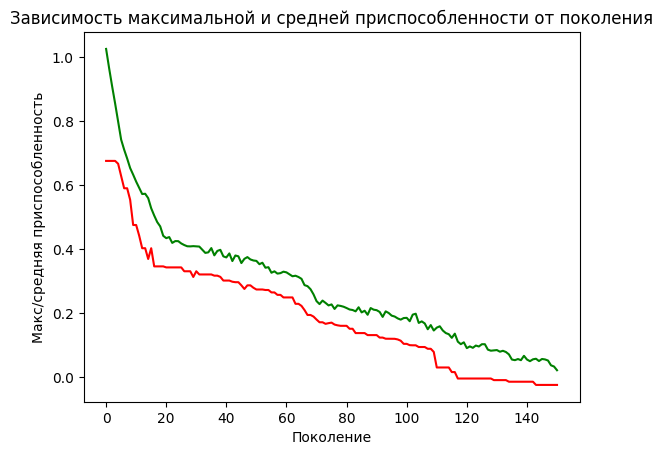

In [29]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

In [34]:
env = gym.make('MountainCar-v0', render_mode='human')
observation = env.reset()
for action in best:
    env.step(action)
    env.render()

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym